## Import libraries

In [0]:
import keras
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import pickle

## Load MNIST data

In [0]:
(train_x, _), (test_x, _) = mnist.load_data()

In [0]:
train_x = train_x.astype('float32')/255
test_x = test_x.astype('float32')/255
train_x = train_x.reshape(len(train_x), 28,28,1)
test_x = test_x.reshape(len(test_x), 28,28,1)

In [16]:
train_x.shape

(60000, 28, 28, 1)

In [17]:
noise_factor = .99 * np.random.random_sample()
print(noise_factor)

0.8092934934850354


## Introduce random uniform noise in the train and test set <br>
* Rather than taking a complete random uniform noise as the train set, random uniform noise is added to the train set.
* The random uniform noise is generated with mean and standard deviation as 1 and is kept between 0 to 1.
* If we use just random noise as the training data the model performs worse and hence some kind of grouping of the training data is needed for the model to train on. 

In [0]:
x_train_noisy = (train_x +  np.random.normal(loc=1.0, scale=1.0, size=train_x.shape))/ 2
x_test_noisy = (test_x + np.random.normal(loc=1.0, scale=1.0, size=test_x.shape)) / 2

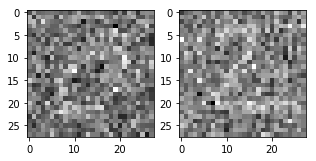

In [19]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

## Decoder part of the network
* The assumption is that the trained model will be given a random noise vector of size 28 * 28 * 1 directly to the decoder part and is expected to output a MNIST like image
* Hence the decoder is given a 28 * 28 * 1 image and that is why no upsampling layer is there. If there is to be an encoded image that is being provided to the decoder after the encoder part, then the model needs to be adjusted accordingly and retrained.

In [0]:
input_img = Input(shape=(28, 28, 1))

In [0]:
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)

In [22]:
#print(encoded)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
print(x.shape)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
#x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)

(?, 28, 28, 8)
(?, 28, 28, 16)
(?, 28, 28, 32)
(?, 28, 28, 64)
(?, 28, 28, 128)
(?, 28, 28, 1)


## Define the model and compile with loss function

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Training the model
* The training is done for 200 epochs
* The train data is the noisy data generated earlier while the ground truth remains the same (original data).

In [24]:
epochs = 200
autoencoder_train = autoencoder.fit(x_train_noisy, train_x, epochs=epochs, batch_size=128, shuffle=True, validation_data=(x_test_noisy, test_x),
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
 - 21s - loss: 0.2426 - val_loss: 0.1849
Epoch 2/200
 - 21s - loss: 0.1766 - val_loss: 0.1746
Epoch 3/200
 - 21s - loss: 0.1701 - val_loss: 0.1651
Epoch 4/200
 - 21s - loss: 0.1662 - val_loss: 0.1619
Epoch 5/200
 - 21s - loss: 0.1637 - val_loss: 0.1623
Epoch 6/200
 - 21s - loss: 0.1623 - val_loss: 0.1600
Epoch 7/200
 - 21s - loss: 0.1611 - val_loss: 0.1585
Epoch 8/200
 - 21s - loss: 0.1600 - val_loss: 0.1581
Epoch 9/200
 - 21s - loss: 0.1595 - val_loss: 0.1604
Epoch 10/200
 - 21s - loss: 0.1588 - val_loss: 0.1574
Epoch 11/200
 - 21s - loss: 0.1585 - val_loss: 0.1570
Epoch 12/200
 - 21s - loss: 0.1580 - val_loss: 0.1573
Epoch 13/200
 - 21s - loss: 0.1578 - val_loss: 0.1559
Epoch 14/200
 - 21s - loss: 0.1573 - val_loss: 0.1560
Epoch 15/200
 - 21s - loss: 0.1568 - val_loss: 0.1552
Epoch 16/200
 - 21s - loss: 0.1567 - val_loss: 0.1561
Epoch 17/200
 - 21s - loss: 0.1565 - val_loss: 0.1565
Epoch 18/200
 - 21s - loss: 0.1561 - val_

## Plot the curve between training and validation loss

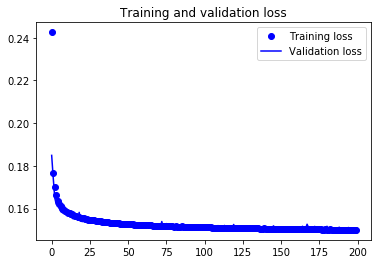

In [25]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epoch = range(epochs)
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predict the decoded images from the test set

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

## Plot the decoded images against the original (without noise) images

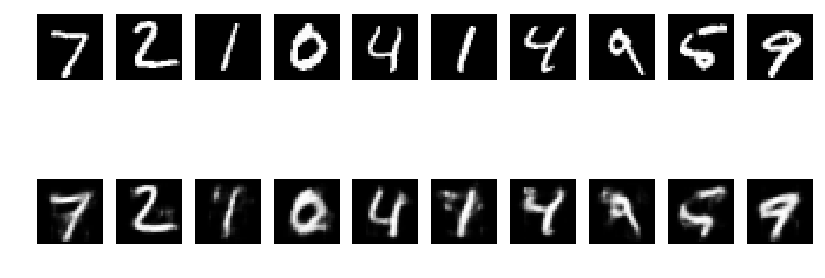

In [27]:
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    #plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()
    

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

In [0]:
def show_img(img):  
  n,i = 10,0
  plt.figure(figsize=(10, 4), dpi=100)

  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(img.reshape(28, 28))
  plt.gray()
  ax.set_axis_off()

  plt.show()

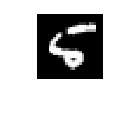

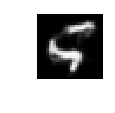

In [29]:
i = 8
t = x_test_noisy[i]
t.shape
x = np.expand_dims(t, axis=0)
x.shape
d = autoencoder.predict(x)
show_img(test_x[i])
show_img(d)

## Generate a random noise vector and output as a MNIST like image

False


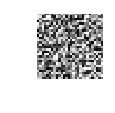

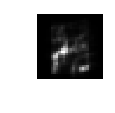

In [30]:
# random vector to mnist image

r = np.random.randint(0, 255, (28,28,1))
print((r==t).all())
r = np.expand_dims(r, axis=0)
r = r.astype('float32')/255
r = r.reshape(len(r), 28,28,1)
r_dec = autoencoder.predict(r)
show_img(r)
show_img(r_dec)

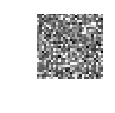

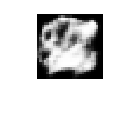

In [31]:
# replacing values at random indexes of a noisy image and then generating back the original
y = t
# random boolean mask for which values will be changed
mask = np.random.randint(0,2,size=y.shape).astype(np.bool)

# random matrix the same shape of your data
r = np.random.rand(*y.shape)*np.max(y)

# use your mask to replace values in your input array
y[mask] = r[mask]

y = np.expand_dims(y, axis=0)
y_dec = autoencoder.predict(y)
show_img(t)
show_img(y_dec)